<a href="https://colab.research.google.com/github/DebarshiSonowal/18CSC304J-CD/blob/master/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, Input, Flatten, Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, concatenate
from keras.models import Model, Sequential
from tensorflow.keras import regularizers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('drive/MyDrive/FinalYearProject/dataset.csv')
df1

,Index,Comment,Label,Link
0,1,বৰ বেয়া লাগে। এওঁলোকে জীৱন টো অকল নিজৰ বুলি ভ...,0,NaN
1,2,দেখাত জেহাদি জেহাদি লাগে,1,NaN
2,3,এই বিজেপিৰ দালালটোক কোনোবাই জোতাৰে কোবা ঐ,1,NaN
3,4,তথাপিও ভোট বিজেপিকেই দিয়া হ'ব সিধা কথা লাগিলে...,0,NaN
4,5,মদ খাই নিজৰ কেৰিয়াৰ ধ্বংস কৰিছে।,0,NaN
...,...,...,...,...
995,996,মেম চাহেবা।বৰলোকৰ মাইকী ।,1,https://youtu.be/9-9XHkozMCQ
996,997,"আইমী বৰুৱা, কালৈকো নকৰে পৰুৱা। ‌মাৰি দিলে কেঁ...",1,https://youtu.be/9-9XHkozMCQ
997,998,অসমত অসমীয়া হৈ সাহিতিক/কলা ব্যৱসায় কৰা তাৰকা...,0,https://youtu.be/9-9XHkozMCQ
998,999,আইমী বৰুৱা নহয় আইমী হাজৰিকা বুলি কৱ,1,https://youtu.be/9-9XHkozMCQ


In [ ]:
print(df1.columns)
df1.head(10)

Index(['Index', 'Comment', 'Label', 'Link'], dtype='object')


,Index,Comment,Label,Link
0,1,বৰ বেয়া লাগে। এওঁলোকে জীৱন টো অকল নিজৰ বুলি ভ...,0,NaN
1,2,দেখাত জেহাদি জেহাদি লাগে,1,NaN
2,3,এই বিজেপিৰ দালালটোক কোনোবাই জোতাৰে কোবা ঐ,1,NaN
3,4,তথাপিও ভোট বিজেপিকেই দিয়া হ'ব সিধা কথা লাগিলে...,0,NaN
4,5,মদ খাই নিজৰ কেৰিয়াৰ ধ্বংস কৰিছে।,0,NaN
5,6,বিপ্লৱৰ কাইঁটীয়া পথ ইমান সহজ নহয় ঐ বাপুহঁত।স...,0,NaN
6,7,কবলৈ ভাষাই নাথাকে নিৰৱ হৈ চকুলো টুকাৰ বাহিৰে। ...,0,NaN
7,8,"যিমানে ভন্দ হব, যিমাপে বেলগ ধৰ্মক বেয়া সমলোছনা...",0,NaN
8,9,"ৰাষ্ট্ৰসংঘকে ভংগ কৰি দিব লাগে , কাম নাইকিয়া ৰা...",0,NaN
9,10,"ক্লা , ঐ ফকটীয়া ফাল্টু ঘোঁ‌ৰা চহিচ । কাম নাই য...",1,NaN


In [ ]:
df1.isnull().sum()

Index        0
Comment      0
Label        0
Link       769
dtype: int64

In [ ]:
import nltk
nltk.download('omw-1.4')
# Converting all string to lower case
df1 = df1.apply(lambda x: x.astype(str).str.lower())

# Removing Punctuations
df1.Comment = df1.Comment.str.replace('[^\s\w]','')

# Removing HTML Tags
df1.Comment = df1.Comment.str.replace('[^\s\w]','')

# Tokenizing
nltk.download('punkt')

df1['comment_token'] = df1['Comment'].apply(lambda x: word_tokenize(x))

# Stemming
ps = PorterStemmer() 

df1.Comment = df1.comment_token.apply(lambda x: list(ps.stem(i) for i in x))

# Removing the stop words and Rejoining 
nltk.download('stopwords')
stops = set(stopwords.words("english"))                  

df1.Comment = df1.Comment.apply(lambda x: ' '.join(list(i for i in x if i not in stops)))

# Lammatizing
nltk.download('wordnet')
lamatizer = WordNetLemmatizer()

df1.Comment.apply(lambda x: lamatizer.lemmatize(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0                      বৰ বয লগ এওলক জৱন ট অকল নজৰ বল ভৱ
1                                         দখত জহদ জহদ লগ
2                            এই বজপৰ দললটক কনবই জতৰ কব ঐ
3      তথপও ভট বজপকই দয হব সধ কথ লগল ভকষৰ হম তথপও ভট ...
4                                 মদ খই নজৰ কৰযৰ ধবস কৰছ
                             ...                        
995                                      মম চহববৰলকৰ মইক
996                আইম বৰৱ কলক নকৰ পৰৱ মৰ দল কচৱ উভত নচৱ
997    অসমত অসময হ সহতককল বযৱসয কৰ তৰক সকলল এট বশষ অন...
998                           আইম বৰৱ নহয় আইম হজৰক বল কৱ
999                          আইমবৰৱ ৰ লজ আছজদ আৰ চনম নকৰ
Name: Comment, Length: 1000, dtype: object

In [ ]:
df1.columns

Index(['Index', 'Comment', 'Label', 'Link', 'comment_token'], dtype='object')

In [ ]:
tokenizer = Tokenizer(num_words = 4500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = df1.Comment)
X1 = tokenizer.texts_to_sequences(texts = df1.Label)
# X2 = tokenizer.texts_to_sequences(texts = df1.offensive_language)
# X3 = tokenizer.texts_to_sequences(texts = df1.neither)
X4 = tokenizer.texts_to_sequences(texts = df1.Comment)
word_index = tokenizer.word_index

In [ ]:

data1 = pad_sequences(sequences= X1)
class1 = to_categorical(np.asarray(df1['Label']), num_classes = 3)




print('Length of data1 tensor:', data1.shape)
# print('Length of labels1 tensor:', class1.shape)
# print('Length of data1 tensor:', data2.shape)
# print('Length of labels1 tensor:', class2.shape)

Length of data1 tensor: (1000, 1)


In [ ]:
indices1 = np.arange(df1.shape[0])
np.random.shuffle(indices1)
data1 = data1[indices1]
class1 = class1[indices1]
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, class1, test_size=0.2, random_state=42)
x_test1, x_val1, y_test1, y_val1 = train_test_split(data1, class1, test_size=0.4, random_state=42)
print('1:')
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)
print(x_val1.shape)
print(y_val1.shape)

1:
(800, 1)
(800, 3)
(600, 1)
(600, 3)
(400, 1)
(400, 3)


In [ ]:
#Using Pre-trained word embeddings
MAX_SEQUENCE_LENGTH = 1000
GLOVE_DIR = "drive/MyDrive/FinalYearProject/Glove/" 
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=1000)

Total 400000 word vectors in Glove.


In [ ]:
### Model for 1st data set (test_data1)
def LSTM_model(n, x_train, y_train, x_val, y_val, x_test, y_test):
    lstm_model = Sequential()
    lstm_model.add(Embedding(len(word_index) + 1, 100, weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False))
    lstm_model.add(LSTM(128))
    lstm_model.add(Dense(128, activation = 'relu'))
    lstm_model.add(Dense(64, activation = 'relu'))
    lstm_model.add(Dense(32, activation = 'relu'))
    lstm_model.add(Dense(3, activation = 'softmax'))
    lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    lstm_model.summary()
    history = lstm_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 15, batch_size = 128)
    print('\nModel Training Complete !')
    
    ### PREDICTION
    y_preds = lstm_model.predict(x_test)
    y_pred = np.round(y_preds)
    cpred = float(sum(y_pred == y_test)[0])
    cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
    print("\n-> Correct predictions:", cpred)
    print("\n-> Total number of test examples:", len(y_test))
    print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
    print("\n-> Confusion for Dataset",n,": ", cm)

    plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Confusion matrix - CNN Model 1')
    plt.colorbar()
    plt.ylabel('Expected label')
    plt.xlabel('Predicted label')
    plt.show()
    return history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         393700    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 537,895
Trainable params: 144,195
Non-trai

7/7 [==============================] - ETA: 0s - loss: 0.6162 - accuracy: 0.9362 

7/7 [==============================] - 4s 113ms/step - loss: 0.6162 - accuracy: 0.9362 - val_loss: 0.4903 - val_accuracy: 1.0000
Epoch 2/15
7/7 [==============================] - 0s 15ms/step - loss: 0.3884 - accuracy: 1.0000 - val_loss: 0.2153 - val_accuracy: 1.0000
Epoch 3/15
7/7 [==============================] - 0s 13ms/step - loss: 0.1335 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/15
7/7 [==============================] - 0s 13ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2224e-04 - val_accuracy: 1.0000
Epoch 6/15
7/7 [==============================] - 0s 14ms/step - loss: 3.8075e-04 - accuracy: 1.0000 - val_loss: 1.7334e-04 - val_accuracy: 1.0000
Epoch 7/15
7/7 [==============================] - 0s 14ms/step - loss: 1.2617e-04 - accuracy: 1.0000 - val_loss: 8.1104e-05 - val_accuracy: 1.0000
Epoch 8/15
7/7 [=

19/19 [==============================] - 1s 2ms/step

-> Correct predictions: 600.0

-> Total number of test examples: 600

-> Accuracy of model:  1.0

-> Confusion for Dataset 1 :  [[351   0]
 [  0 249]]


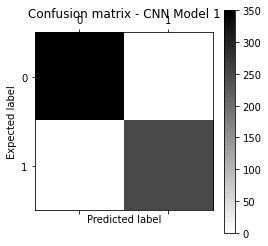

In [ ]:
history = LSTM_model(1, x_train1, y_train1, x_val1, y_val1, x_test1, y_test1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


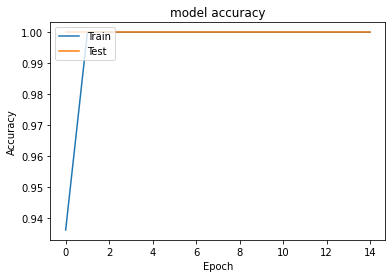

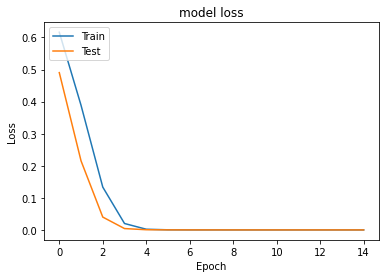

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(len(word_index) + 1, 100, weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dense(64, activation = 'relu'))
lstm_model.add(Dense(32, activation = 'relu'))
lstm_model.add(Dense(3, activation = 'softmax'))
lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
lstm_model.summary()

print(lstm_model.predict('মেম চাহেবা।বৰলোকৰ মাইকী ।'))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         393700    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 537,895
Trainable params: 144,195
Non-tr

IndexError: ignored

# New Section